## Data Analysis of Unicorn Companies

This notebook presents an exploratory data analysis (EDA) of a dataset containing information on global unicorn companies (privately held startups valued at over $1 billion). The primary goal of this project is to uncover trends, patterns, and insights related to their growth, funding, and industry distribution.


## 1. Data Loading and Initial Inspection

In [1]:
## import all neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load the data
data = pd.read_csv('Unicorn_Companies.csv',
                  delimiter = 
                  ",")
data

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [3]:
## make a copy of the data
df = data.copy()

In [4]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [5]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [6]:
df.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [7]:
df.value_counts()

Company        Valuation  Date Joined  Industry                      City           Country        Continent      Year Founded  Funding  Select Investors                                           
1047 Games     $2B        2021-09-14   Internet software & services  Zephyr Cove    United States  North America  2017          $127M    VGames, Lakestar, Galaxy Interactive                           1
PolicyBazaar   $2B        2019-05-06   Fintech                       Gurgaon        India          Asia           2008          $634M    Info Edge, Softbank Capital                                    1
Phenom People  $1B        2021-04-07   Internet software & services  Ambler         United States  North America  2011          $163M    Sierra Ventures, AXA Venture Partners, Sigma Prime Ventures    1
PicsArt        $1B        2021-08-26   Mobile & telecommunications   San Francisco  United States  North America  2011          $195M    Sequoia Capital, DCM Ventures, Insight Partners             

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [9]:
## Check for Null Values
df.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

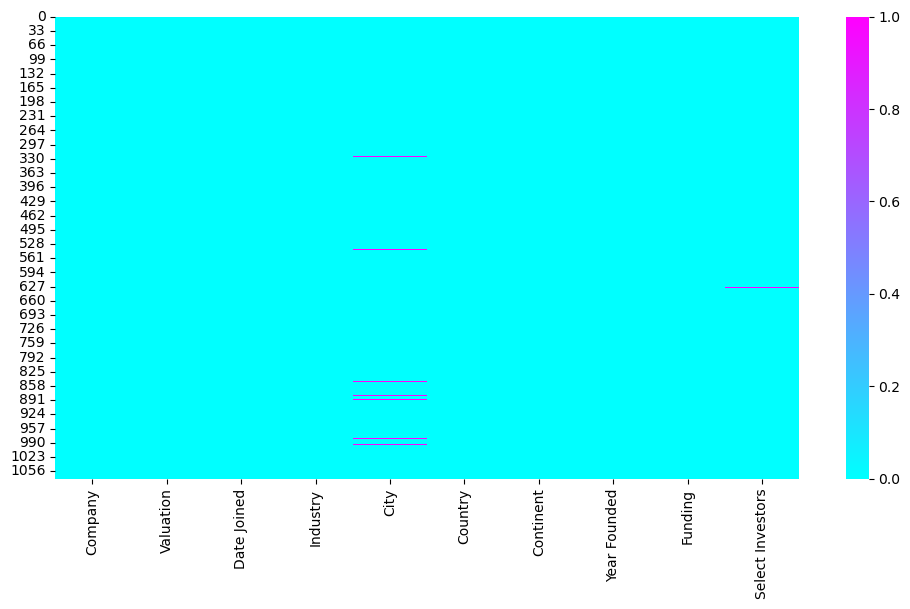

In [10]:
plt.figure(figsize =(12,6))
sns.heatmap(df.isnull(),cbar= True, cmap="cool")
plt.show()

 there are 16 na values in the city column and 1 in the select investor column


## 2. Data Cleaning and Preprocessing

In [11]:
# Lets look through the data column by column starting with company
df['Company'].value_counts()

Company
Bolt               2
Bytedance          1
Yidian Zixun       1
Klook              1
Epirus             1
                  ..
eDaili             1
ENOVATE            1
Fenbi Education    1
Hesai Tech         1
Zwift              1
Name: count, Length: 1073, dtype: int64

In [12]:
## we notice that there are two Bolt Cpmpanies, lets look into that
bolt_df = df[df['Company'] == "Bolt"] 

In [13]:
bolt_df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


 we can see the bolt companies are seperate companies

In [14]:
## Eyeball the data again
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


In [15]:
## There are some companies with '.com' in there names, lets remove that
df['Company'] = df['Company'].astype(str).replace(".com","" ,regex = True)

In [16]:
## We would also remove the Currency($) as well asthe "B" and "M" in the the valuation column and change the data type to intergers
df['Valuation'] = df['Valuation'].astype(str).replace('([^\w/-])','', regex = True).replace("B","" ,regex = True).astype(int)

In [17]:
df['Valuation']

0       180
1       100
2       100
3        95
4        46
       ... 
1069      1
1070      1
1071      1
1072      1
1073      1
Name: Valuation, Length: 1074, dtype: int32

In [18]:
df = df.rename(columns={'Valuation': 'Valuation ($B)'})

In [19]:
## lets look at the Date column 
df["Date Joined"]

0       2017-04-07
1       2012-12-01
2       2018-07-03
3       2014-01-23
4       2011-12-12
           ...    
1069    2017-06-29
1070    2017-04-18
1071    2021-05-06
1072    2021-10-19
1073    2020-09-16
Name: Date Joined, Length: 1074, dtype: object

In [20]:
# First, ensure the 'Date Joined' column is in datetime format
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

# Then, extract only the year
df['Year Joined'] = df['Date Joined'].dt.year

In [21]:
## lets look at the Industry Column
df['Industry'].value_counts()

Industry
Fintech                                224
Internet software & services           205
E-commerce & direct-to-consumer        111
Health                                  74
Artificial intelligence                 73
Other                                   58
Supply chain, logistics, & delivery     57
Cybersecurity                           50
Data management & analytics             41
Mobile & telecommunications             38
Hardware                                34
Auto & transportation                   31
Edtech                                  28
Consumer & retail                       25
Travel                                  14
Artificial Intelligence                 11
Name: count, dtype: int64

The data reveals that Fintech and Internet software & services are the two dominant industries among the listed companies, with 224 and 205 companies respectively. This indicates a strong prevalence of financial technology and software-based solutions.

E-commerce & direct-to-consumer also stands out with 111 companies, showcasing the significant growth and presence of online retail. Health and Artificial intelligence are also notable sectors, with 74 and 73 companies respectively (including the separate "Artificial Intelligence" category with 11 companies, totaling 84 for AI if combined). This suggests a strong focus on innovation in healthcare and AI-driven solutions.

Other industries like Supply chain, logistics, & delivery (57) and Cybersecurity (50) also have a substantial presence, highlighting their importance in the current economic landscape. Conversely, industries such as Travel (14), Consumer & retail (25), and Edtech (28) appear to have a smaller representation in this dataset

In [22]:
df["Industry"]

0               Artificial intelligence
1                                 Other
2       E-commerce & direct-to-consumer
3                               Fintech
4                               Fintech
                     ...               
1069    E-commerce & direct-to-consumer
1070    E-commerce & direct-to-consumer
1071                  Consumer & retail
1072                            Fintech
1073    E-commerce & direct-to-consumer
Name: Industry, Length: 1074, dtype: object

In [23]:
## Remember we encountered 16 missing values in the city column earlier. lets look that the rows with these missing values
missing_city_df = df[df['City'].isnull()]

In [24]:
missing_city_df

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021
170,HyalRoute,4,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020
242,Moglix,3,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021
251,Trax,3,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019
325,Amber Group,3,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021
382,Ninja Van,2,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021
541,Advance Intelligence Group,2,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021
811,Carousell,1,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021
848,Matrixport,1,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021
880,bolttech,1,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti...",2021


In [25]:
missing_city_df['Country']

12        Bahamas
170     Singapore
242     Singapore
251     Singapore
325     Hong Kong
382     Singapore
541     Singapore
811     Singapore
848     Singapore
880     Singapore
889     Singapore
893     Hong Kong
980     Singapore
986     Singapore
994     Singapore
1061    Hong Kong
Name: Country, dtype: object

Bahamas , Singapore, and Hong Kong are indeed city-states or comprise a primary city that functions as the entire national entity. that is why they have empty City column. To resolve this issue, we are going to populate the City column with the corresponding Country column.

In [26]:
df['City'] = np.where(df['City'].isnull(), df['Country'], df['City'])

In [27]:
df['City'].sort_values()

575          Aarhus
386        Aberdeen
293         Alameda
997      Alexandria
408      Altrincham
           ...     
608            Wuxi
355     Zephyr Cove
131          Zhuhai
983          Zurich
1017         Zurich
Name: City, Length: 1074, dtype: object

In [28]:
## Check for more missing values
df.isna().sum()

Company             0
Valuation ($B)      0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    1
Year Joined         0
dtype: int64

In [29]:
## lets look at the Country column
df["Country"]

0                China
1        United States
2                China
3        United States
4               Sweden
             ...      
1069             China
1070             China
1071             China
1072    United Kingdom
1073     United States
Name: Country, Length: 1074, dtype: object

In [30]:
df["Country"].nunique()

46

In [31]:
df["Country"].value_counts()

Country
United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Argentina   

In [32]:
## Lets check the Continent column
df['Continent']

0                Asia
1       North America
2                Asia
3       North America
4              Europe
            ...      
1069             Asia
1070             Asia
1071             Asia
1072           Europe
1073    North America
Name: Continent, Length: 1074, dtype: object

In [33]:
df["Continent"].value_counts()

Continent
North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: count, dtype: int64

In [34]:
## Lets look at the funding Column
df['Funding'].unique()

array(['$8B', '$7B', '$2B', '$4B', '$572M', '$3B', '$14B', '$5B', '$918M',
       '$476M', '$770M', '$979M', '$721M', '$490M', '$734M', '$427M',
       '$400M', '$1B', '$799M', '$765M', '$800M', '$376M', '$558M',
       '$294M', '$564M', '$333M', '$691M', '$343M', '$497M', '$71M',
       '$679M', '$775M', '$105M', '$742M', '$607M', '$549M', '$660M',
       '$820M', '$297M', '$922M', '$863M', '$447M', '$844M', '$603M',
       '$583M', '$912M', '$920M', '$849M', '$424M', '$645M', '$802M',
       '$629M', '$448M', '$928M', '$815M', '$728M', '$433M', '$891M',
       '$524M', '$803M', '$415M', '$587M', '$826M', '$910M', '$412M',
       '$405M', '$729M', '$600M', '$869M', '$187M', '$943M', '$514M',
       '$492M', '$644M', '$562M', '$286M', '$559M', '$647M', '$567M',
       '$428M', '$996M', '$596M', '$426M', '$462M', '$824M', '$926M',
       '$755M', '$633M', '$599M', '$371M', '$425M', '$761M', '$903M',
       '$704M', '$503M', '$655M', '$263M', '$216M', '$128M', '$776M',
       '$119M', '$

we need th standadize the Funding column, and repeat what we did in the valuation Column

In [35]:
##Replace '$','B' and 'M' from the column and change the data type to integer
df['Funding'] = df['Funding'].astype(str).replace('([^\w/-])','', regex = True).replace(["B","M"],"" ,regex = True).replace('Unknown','0',regex= True).astype(int)

In [36]:
df["Funding"]

0         8
1         7
2         2
3         2
4         4
       ... 
1069    379
1070    990
1071     80
1072    792
1073    620
Name: Funding, Length: 1074, dtype: int32

In [37]:
df['Funding']=np.where(df['Funding'] == 0,df['Funding'].mode() ,df['Funding'])

In [38]:
df['Funding'].sort_values

<bound method Series.sort_values of 0         8
1         7
2         2
3         2
4         4
       ... 
1069    379
1070    990
1071     80
1072    792
1073    620
Name: Funding, Length: 1074, dtype: int32>

In [39]:
## Standadize the column
df['Funding']=np.where(df['Funding']>15,df["Funding"]/1000,df["Funding"])

In [40]:
df['Funding']

0       8.000
1       7.000
2       2.000
3       2.000
4       4.000
        ...  
1069    0.379
1070    0.990
1071    0.080
1072    0.792
1073    0.620
Name: Funding, Length: 1074, dtype: float64

In [41]:
df

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000,"Institutional Venture Partners, Sequoia Capita...",2011
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,0.379,"K2 Ventures, Matrix Partners China, IDG Capital",2017
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,0.990,"58.com, Tencent Holdings",2017
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,0.080,"Xingwang Investment Management, China Capital ...",2021
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,0.792,"IAG Capital Partners, Augmentum Fintech, North...",2021


In [42]:
## lets look at the Selected Investors column and split it
investors=df["Select Investors"].str.split(',', expand=True)

In [43]:
investors

,0,1,2,3
0,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Khosla Ventures,LowercaseCapital,capitalG,None
4,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
...,...,...,...,...
1069,K2 Ventures,Matrix Partners China,IDG Capital,None
1070,58.com,Tencent Holdings,None,None
1071,Xingwang Investment Management,China Capital Investment Group,Matrix Partners China,None
1072,IAG Capital Partners,Augmentum Fintech,Northzone Ventures,None


In [44]:
investors_stacked = investors.stack().reset_index(drop=True)
investors_stacked

0          Sequoia Capital China
1           SIG Asia Investments
2                     Sina Weibo
3                 Softbank Group
4                  Founders Fund
                  ...           
3048           Augmentum Fintech
3049          Northzone Ventures
3050            Novator Partners
3051                        True
3052     Causeway Media Partners
Length: 3053, dtype: object

In [45]:
investors_df = pd.DataFrame(investors_stacked)
investors_df=investors_df.drop_duplicates()
investors_df[0].unique()

array(['Sequoia Capital China', ' SIG Asia Investments', ' Sina Weibo',
       ..., 'Novator Partners', ' True', ' Causeway Media Partners'],
      dtype=object)

In [46]:
## let look at the top ten Investors
top_ten_investors = pd.DataFrame(investors_stacked)[0].value_counts().sort_values(ascending = False).head(10)
top_ten_investors

0
 Tiger Global Management    39
 Accel                      32
 Sequoia Capital            30
Sequoia Capital China       30
Andreessen Horowitz         29
Accel                       28
 Andreessen Horowitz        24
 Insight Partners           24
Insight Partners            23
 General Catalyst           23
Name: count, dtype: int64

<Axes: xlabel='0'>

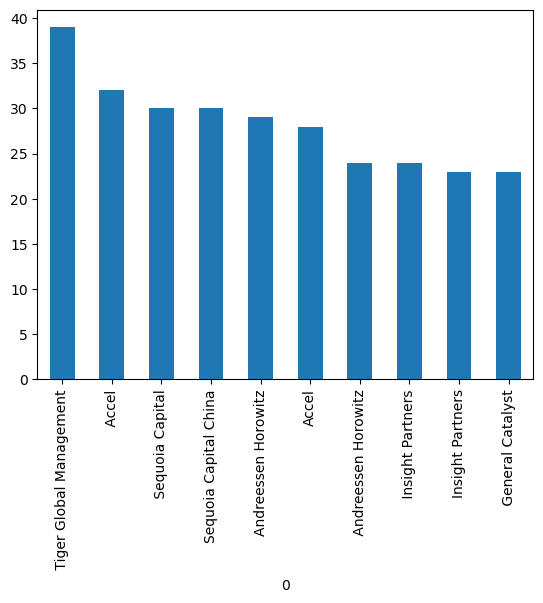

In [47]:
top_ten_investors.plot(kind="bar")

In [48]:
missing_investors_df = investors_stacked[investors_stacked==""]
missing_investors_df

309     
2585    
dtype: object

In [49]:
## Check for missing values in the select Investor column
df["Select Investors"].isna().sum()

1

In [50]:
#3 Replace the missing value with "Unknown"
df['Select Investors']=df['Select Investors'].fillna('Unknown')


In [51]:
df

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.000,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.000,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.000,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.000,"Institutional Venture Partners, Sequoia Capita...",2011
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,0.379,"K2 Ventures, Matrix Partners China, IDG Capital",2017
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,0.990,"58.com, Tencent Holdings",2017
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,0.080,"Xingwang Investment Management, China Capital ...",2021
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,0.792,"IAG Capital Partners, Augmentum Fintech, North...",2021


In [52]:
## rename the 'Valuation' column
df = df.rename(columns={'Valuation': 'Valuation ($B)'})


In [53]:
## Rename the "Funding" column
df=df.rename(columns={'Funding': 'Funding ($B)'})


In [54]:
## eye ball the data
df.head()

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding ($B),Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011


In [55]:
investors_df

,0
0,Sequoia Capital China
1,SIG Asia Investments
2,Sina Weibo
3,Softbank Group
4,Founders Fund
...,...
3047,IAG Capital Partners
3048,Augmentum Fintech
3050,Novator Partners
3051,True


In [56]:
#3 Data Cleaing complete, we can  now rename the data
cleaned_df = df.copy()

In [57]:
cleaned_df.head()

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding ($B),Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011


In [58]:
numerical_cols = cleaned_df.select_dtypes(include = ['int64', 'float64','int32']).columns.tolist()
numerical_cols

['Valuation ($B)', 'Year Founded', 'Funding ($B)', 'Year Joined']

In [59]:
df.describe()

,Valuation ($B),Date Joined,Year Founded,Funding ($B),Year Joined
count,1074.000000,1074,1074.000000,1074.000000,1074.000000
mean,3.455307,2020-05-19 15:35:51.955307264,2012.895717,0.608725,2019.896648
min,1.000000,2007-07-02 00:00:00,1919.000000,0.017000,2007.000000
25%,1.000000,2019-05-20 06:00:00,2011.000000,0.226000,2019.000000
50%,2.000000,2021-03-29 00:00:00,2014.000000,0.378500,2021.000000
75%,3.000000,2021-09-19 18:00:00,2016.000000,0.638500,2021.000000
max,180.000000,2022-04-05 00:00:00,2021.000000,15.000000,2022.000000
std,8.547022,NaN,5.698573,1.076820,2.001288


#"Valuation (B)": This column shows the valuation of 1074 companies, which ranges from $1 billion to 180 billion. The average valuation is 3.46 billion, and the standard deviation is 8.55 billion.

#Date Joined: This column shows the date when each company joined. The earliest date is July 2nd, 2007, and the latest date is April 5th, 2022. The average date is May 19th, 2020, at 15:35:51.

#Year Founded: This column shows the year when each company was founded, ranging from 1919 to 2021. The average year founded is November 23rd, 2012, at 12:12:04.

#Funding (1B): This column shows the funding of each company, ranging from 0.017 billion to 15 billion. The average funding is 0.61 billion, and the standard deviation is 1.08 billion.




## Exploratory Data Analysis

In [60]:
df.loc[:,['Company',"Valuation ($B)"]].head(10)

,Company,Valuation ($B)
0,Bytedance,180
1,SpaceX,100
2,SHEIN,100
3,Stripe,95
4,Klarna,46
5,Canva,40
6,Checkout,40
7,Instacart,39
8,JUUL Labs,38
9,Databricks,38


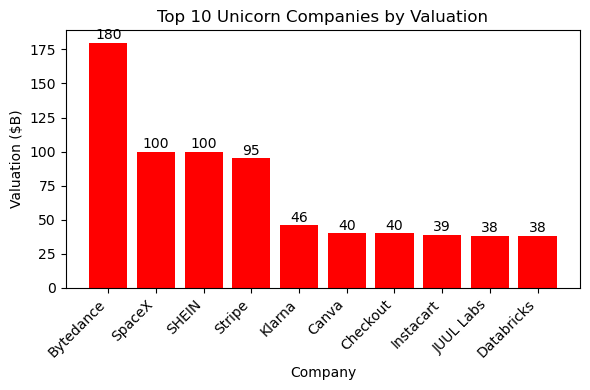

In [61]:
#Lets look at Top Ten Companies with highest valuation
plt.figure(figsize = (6, 4))
bars = plt.bar(x = df['Company'].head(10),
               height = df['Valuation ($B)'].head(10),
               color = 'red')
plt.xlabel('Company')
plt.ylabel('Valuation ($B)')
plt.title('Top 10 Unicorn Companies by Valuation')
plt.xticks(rotation = 45, ha='right') 
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.show()

The valuations of Unicorn companies range from 1  billion USD  to  180  billion USD. 

these are the top ten most valuable unicorn companies.

Bytedance is the most valuable company with a valuation of 180 billion USD.

SpaceX and SHEIN are tied for the second most valuable company with a valuation of 100 billion USD each.

The remaining companies have valuations ranging from 46 billion USD to 38 billion USD.

In [62]:
df["Country"].value_counts().head(10)

Country
United States     562
China             173
India              65
United Kingdom     43
Germany            26
France             24
Israel             20
Canada             19
Brazil             16
Singapore          12
Name: count, dtype: int64

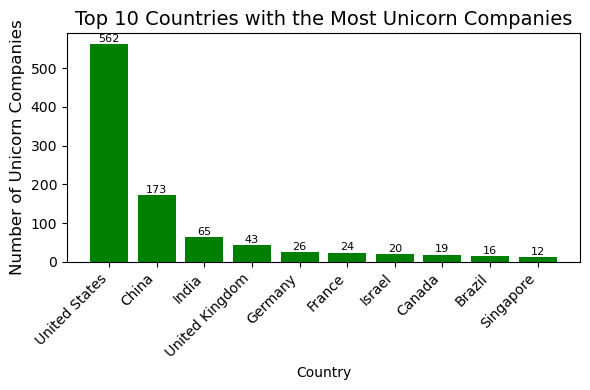

In [63]:

# Calculate the value counts for the 'Country' column and get the top 10
country_counts = df["Country"].value_counts().head(10)


plt.figure(figsize = (6, 4)) 
bars = plt.bar(x = country_counts.index,
               height = country_counts.values,
               color = 'green') 
plt.xlabel('Country', fontsize=10)
plt.ylabel('Number of Unicorn Companies', fontsize=12)
plt.title('Top 10 Countries with the Most Unicorn Companies', fontsize=14)


plt.xticks(rotation = 45, ha='right')


plt.tight_layout()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.5, 
             int(yval), 
             ha='center',
             va='bottom', 
             fontsize=8)
plt.show()

The country with the most companies is the United States, with a count of 562.

China has the second highest number of companies, with a count of 173.

India ranks third, with 65 companies.

The United Kingdom has 43 companies, placing it fourth.

Germany, France, Israel, Canada, Brazil, and Singapore follow with 26, 24, 20, 19, 16, and 12 companies respectively.

In [64]:
#Lets look at the Continent with the most unicorn companies
df["Continent"].value_counts()

Continent
North America    589
Asia             310
Europe           143
South America     21
Oceania            8
Africa             3
Name: count, dtype: int64

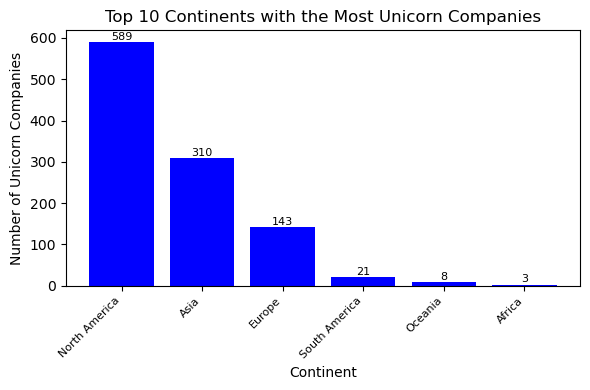

In [65]:
# Calculate the value counts for the 'Continent' column and get the top 10
continent_counts = df["Continent"].value_counts().head(10)


plt.figure(figsize = (6, 4)) 

bars = plt.bar(x = continent_counts.index,
               height = continent_counts.values,
               color = 'blue')


plt.xlabel('Continent', fontsize=10) 
plt.ylabel('Number of Unicorn Companies', fontsize=10)
plt.title('Top 10 Continents with the Most Unicorn Companies', fontsize=12)

plt.xticks(rotation = 45, ha='right', fontsize=8)

plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.2,
             int(yval),
             ha='center',
             va='bottom',
             fontsize=8) 
plt.show()

This Chart provides an overview of the distribution of unicorn companies across different continents.

North America has the highest number of companies, with 589 companies.

Asia ranks second, with 310 companies.

Europe has 143 companies, placing it third.

South America, Oceania, and Africa follow with 21, 8, and 3 companies respectively.

In [66]:
df.loc[:,['Country',"Valuation ($B)"]]

,Country,Valuation ($B)
0,China,180
1,United States,100
2,China,100
3,United States,95
4,Sweden,46
...,...,...
1069,China,1
1070,China,1
1071,China,1
1072,United Kingdom,1


In [67]:
top_countries = df.loc[:,['Country',"Valuation ($B)"]].groupby('Country').sum().sort_values(by='Valuation ($B)', ascending=False).head(10)

In [68]:
top_countries

,Valuation ($B)
Country,
United States,1933
China,696
India,196
United Kingdom,195
Germany,72
Sweden,63
Australia,56
France,55
Canada,49


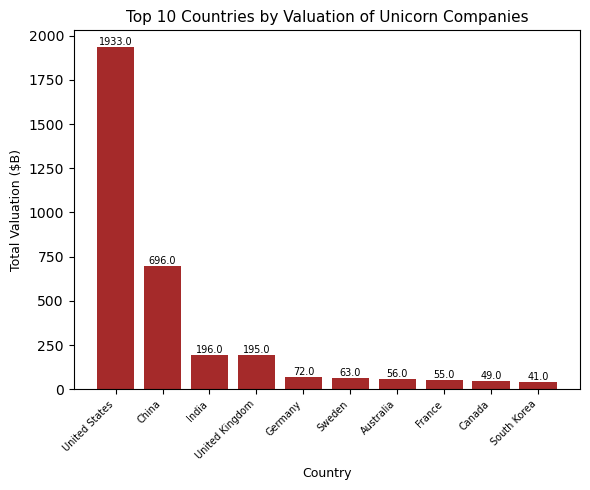

In [69]:
# Calculate total valuation per country and get the top 10
top_countries_by_valuation = df.groupby('Country')['Valuation ($B)'].sum().nlargest(10)


plt.figure(figsize = (6, 5)) 

bars = plt.bar(x = top_countries_by_valuation.index,
               height = top_countries_by_valuation.values,
               color = 'brown')

plt.xlabel('Country', fontsize=9) # 
plt.ylabel('Total Valuation ($B)', fontsize=9)
plt.title('Top 10 Countries by Valuation of Unicorn Companies', fontsize=11)


plt.xticks(rotation = 45, ha='right', fontsize=7)

plt.tight_layout()


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.1,
             f'{yval:.1f}',
             ha='center', 
             va='bottom',
             fontsize=7) 


plt.show()

The United States has the highest number of companies, with 562 , and the highest total valuation of 1.933 trillion dollars.

China ranks second with 173 companies and a total valuation of 696 billion dollars.

India has 65 companies and a total valuation of 196 billion dollars, placing it third in terms of total valuation.

The United Kingdom has 43 companies and a total valuation of 195 billion dollars.

Germany, Sweden, Australia, France, Canada, and South Korea follow with 72, 63, 56, 55, 49, and 41 billion dollars respectively .

In [70]:
country_funding = df.loc[:,['Country',"Funding ($B)"]].groupby('Country').sum()

top_country = country_funding.sort_values(by='Funding ($B)', ascending=False)

top_country.head(10)

,Funding ($B)
Country,
United States,289.149
China,139.414
India,47.663
United Kingdom,30.161
Germany,17.394
Philippines,15.475
France,13.953
Ireland,9.906
Sweden,9.745


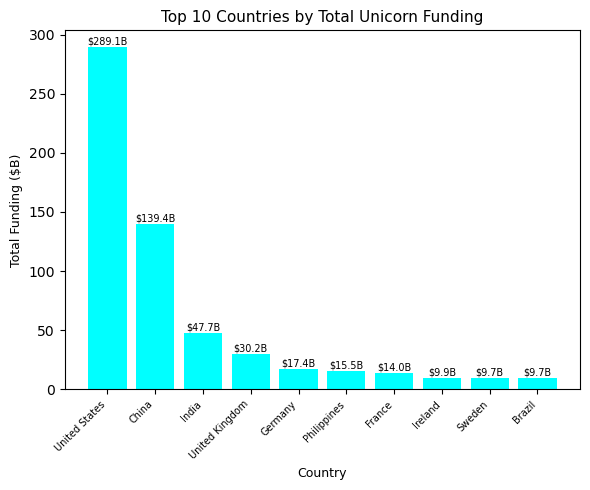

In [71]:
# Calculate total funding per country and get the top 10
country_funding = df.groupby('Country')['Funding ($B)'].sum()
top_country_funding = country_funding.sort_values(ascending=False).head(10)


plt.figure(figsize = (6, 5))

bars = plt.bar(x = top_country_funding.index,
               height = top_country_funding.values,
               color = 'cyan')
plt.xlabel('Country', fontsize=9)
plt.ylabel('Total Funding ($B)', fontsize=9)
plt.title('Top 10 Countries by Total Unicorn Funding', fontsize=11)

plt.xticks(rotation = 45, ha='right', fontsize=7)

plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.5, 
             f'${yval:.1f}B', 
             ha='center', 
             va='bottom', 
             fontsize=7)
plt.show()

The United States has the highest total funding of 289.149 billion dollars.

China ranks second with a total funding of 139.414 billion dollars.

India has a total funding of 47.663 billion dollars, placing it third in terms of total funding.

The United Kingdom has a total funding of 30.161 billion dollars.

Germany, Philippines, France, Ireland, Sweden, and Brazil follow with varying total funding.

In [72]:
# Top companies with the Most Funding
top_companies = df.loc[:,['Company',"Funding ($B)"]].sort_values(by='Funding ($B)', ascending=False).head(10)

print("Top 10 Companies with the Highest Funding:")
print(top_companies)

Top 10 Companies with the Highest Funding:
                    Company  Funding ($B)
1012  Revolution Precrafted          15.0
760             GalaxySpace          14.0
8                 JUUL Labs          14.0
743                  Manner          10.0
792               Workhuman           9.0
0                 Bytedance           8.0
11               Epic Games           7.0
1                    SpaceX           7.0
41                   Swiggy           5.0
38       Xingsheng Selected           5.0


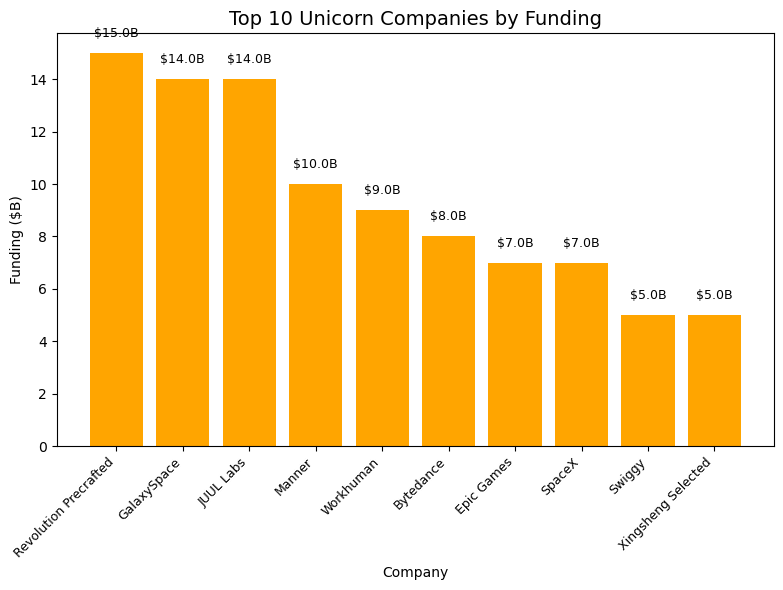

In [73]:
#find the top company with the most funding
top_companies = df.loc[:, ['Company', 'Funding ($B)']].sort_values(by='Funding ($B)', ascending=False).head(10)


plt.figure(figsize = (8, 6))
bars = plt.bar(x = top_companies['Company'],
               height = top_companies['Funding ($B)'],
               color = 'orange') 

plt.xlabel('Company', fontsize=10)
plt.ylabel('Funding ($B)', fontsize=10)
plt.title('Top 10 Unicorn Companies by Funding', fontsize=14)

plt.xticks(rotation = 45, ha='right', fontsize=9)

plt.tight_layout()

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.5,
             f'${yval:.1f}B', 
             ha='center', 
             va='bottom', 
             fontsize=9)
plt.show()

Revolution Precrafted has the highest funding of 15 billion dollars.

GalaxySpace and JUUL Labs rank second, both with a funding of 14 billion dollars.

Manner and Workhuman follow with 10 and 9 billion dollars respectively.

Bytedance, Epic Games, and SpaceX have a funding of 8, 7, and 7 billion dollars respectively.

Swiggy and Xingsheng Selected complete the top 10 with a funding of 5 billion dollars each.

In [74]:
df.head()

,Company,Valuation ($B),Date Joined,Industry,City,Country,Continent,Year Founded,Funding ($B),Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011


In [75]:
df['Year Joined'].value_counts()

Year Joined
2021    520
2022    116
2020    108
2019    104
2018    103
2017     44
2015     35
2016     21
2014     13
2012      4
2013      3
2011      2
2007      1
Name: count, dtype: int64

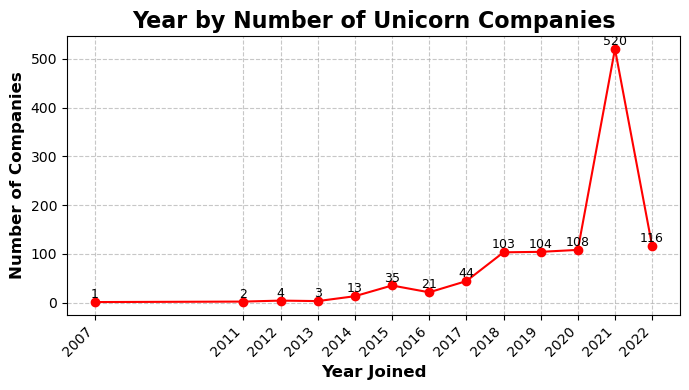

In [76]:
# Calculate the number of companies that became Unicorns each year
companies_by_year = df['Year Joined'].value_counts().sort_index()

plt.figure(figsize = (7, 4))

plt.plot(companies_by_year.index, companies_by_year.values, marker='o', color='red')

plt.xlabel("Year Joined", fontsize = 12, fontweight= 'bold')
plt.ylabel("Number of Companies", fontsize = 12, fontweight= 'bold')
plt.title("Year by Number of Unicorn Companies", fontsize = 16, fontweight= 'bold')


for year, count in companies_by_year.items():

    plt.text(year, count + 2, str(int(count)), ha='center', va='bottom', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)


plt.xticks(companies_by_year.index, rotation = 45, ha='right', fontsize=10)

plt.tight_layout()

plt.show()

 in the year 2007, a single company  became a unicorn company. This brave company paved the way for future entrepreneurs and set the stage for an era of innovation.

As time went on, more and more companies joined the unicorn club. In 2011, two companies managed to achieve this prestigious status, showcasing the growing potential of startups. However, it wasn't until 2013 that the number of unicorn companies began to gain momentum, with three companies joining the elite ranks.

The years that followed saw a steady increase in the number of unicorn companies. In 2014, 13 companies emerged as unicorns, marking a significant leap forward. The trend continued in 2015, with 35 new unicorns making their mark on the business landscape.

By 2017, the unicorn phenomenon had captured the attention of entrepreneurs worldwide. A total of 44 companies achieved unicorn status, signaling a growing interest in disruptive ideas and groundbreaking technologies.

In the years that followed, the unicorn club continued to expand. In 2018, 103 companies joined the ranks, followed closely by 104 in 2019. The momentum carried into 2020, as 108 new unicorns emerged amidst global challenges.

However, it was in 2021 that the unicorn revolution reached its peak. A staggering 520 companies joined the unicorn club, representing a remarkable surge in entrepreneurial success and investor confidence.

The following year, in 2022, 116 companies managed to achieve unicorn status, although at a slower pace compared to the previous year. This signaled both the saturation and maturation of the market.

As we reflect on this journey through time, it becomes clear that the rise of unicorns symbolizes a new era of innovation and disruption. These companies have reshaped industries, created new opportunities, and inspired countless entrepreneurs to dream big.

Who knows what the future holds? Perhaps more unicorns will emerge, pushing the boundaries of what is possible and shaping the world we live in. Only time will tell.



In [77]:
 #Calculate total funding by year and sort by year for chronological plotting.
if 'Year Joined' in df.columns and 'Funding ($B)' in df.columns:
    funding_by_year = df.groupby('Year Joined')['Funding ($B)'].sum().sort_index()
else:
    print("Error: Required columns ('Year Joined' or 'Funding ($B)') not available for plotting.")
    funding_by_year = pd.Series() 

funding_by_year

Year Joined
2007      1.000
2011      5.000
2012     11.858
2013      1.352
2014     18.059
2015     13.377
2016     20.830
2017     65.551
2018     92.112
2019     82.922
2020    100.250
2021    205.836
2022     35.624
Name: Funding ($B), dtype: float64

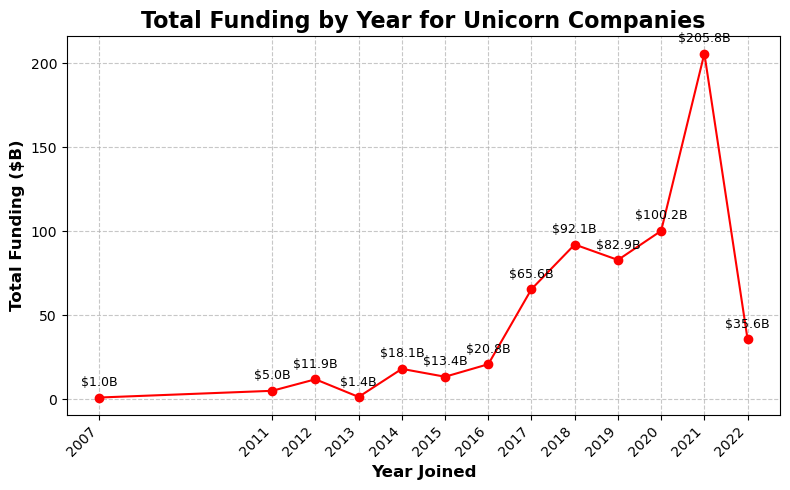

In [78]:
plt.figure(figsize = (8, 5))


plt.plot(funding_by_year.index, funding_by_year.values, marker='o', color='red')

plt.xlabel("Year Joined", fontsize = 12, fontweight= 'bold')
plt.ylabel("Total Funding ($B)", fontsize = 12, fontweight= 'bold')
plt.title("Total Funding by Year for Unicorn Companies", fontsize = 16, fontweight= 'bold')


for year, funding in funding_by_year.items():
    if not np.isnan(funding):
        plt.text(year, funding + 5, f'${funding:.1f}B', ha='center', va='bottom', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.7)


plt.xticks(funding_by_year.index, rotation = 45, ha='right', fontsize=10)

plt.tight_layout()

plt.show()

In [79]:
# Get the top 3 cities with the most unicorn companies
top_3_cities = df["City"].value_counts().head(3)
top_3_cities

City
San Francisco    152
New York         103
Beijing           63
Name: count, dtype: int64

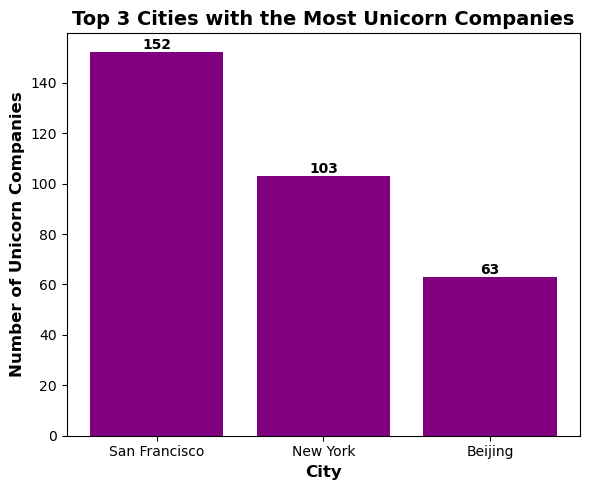

In [80]:


plt.figure(figsize = (6, 5)) 

bars = plt.bar(x = top_3_cities.index,
               height = top_3_cities.values,
               color = 'purple')

plt.xlabel('City', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of Unicorn Companies', fontsize = 12, fontweight = 'bold')
plt.title('Top 3 Cities with the Most Unicorn Companies', fontsize = 14, fontweight = 'bold')

plt.xticks(rotation = 0, ha='center', fontsize=10)

plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.1, 
             int(yval), 
             ha='center',
             va='bottom',
             fontsize=10,
             fontweight='bold')
plt.savefig('top_3_cities_bar_chart.png')

plt.show()

In [81]:
top_industries=df["Industry"].value_counts().head()

In [82]:
top_industries

Industry
Fintech                            224
Internet software & services       205
E-commerce & direct-to-consumer    111
Health                              74
Artificial intelligence             73
Name: count, dtype: int64

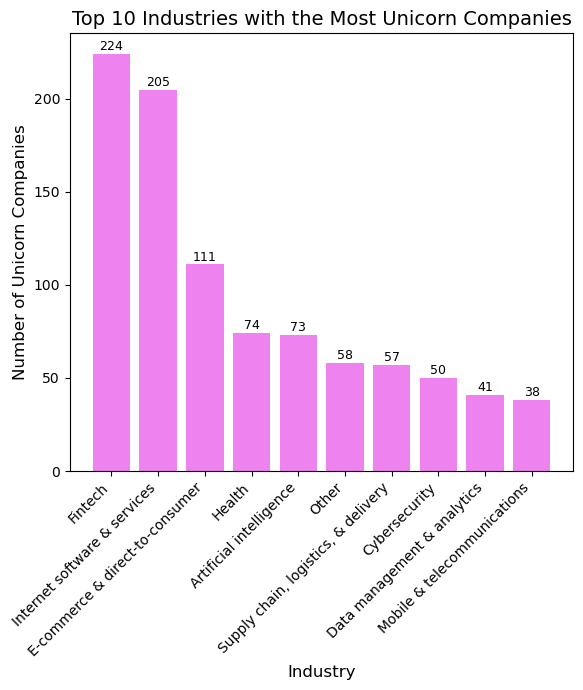

In [83]:

top_industries = df['Industry'].value_counts().head(10)

industry_names = top_industries.index.tolist()
industry_counts = top_industries.values.tolist()

plt.figure(figsize = (6, 7))
bars = plt.bar(industry_names, industry_counts, color='violet')

plt.xlabel("Industry", fontsize=12)
plt.ylabel("Number of Unicorn Companies", fontsize=12)
plt.title("Top 10 Industries with the Most Unicorn Companies", fontsize=14)

plt.xticks(rotation = 45, ha='right', fontsize=10)

plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.5,
             int(yval),
             ha='center',
             va='bottom', 
             fontsize=9)
plt.show()

The chart above highlights the leading industries in a given dataset, with Fintech and Internet software & services clearly dominating. These two sectors collectively account for a significant portion of the entries, with 224 and 205 counts respectively.

Following these leaders, E-commerce & direct-to-consumer stands out as another substantial category, with 111 entries, underscoring the strong presence of online consumer-facing businesses.

Health (74) and Artificial intelligence (73) also represent considerable segments, indicating a notable focus on innovation in these fields.

Other significant industries include Supply chain, logistics, & delivery (57) and Cybersecurity (50), which demonstrate a solid footing in the market. Data management & analytics (41) and Mobile & telecommunications (38) also show a moderate but important presence.

Overall, the distribution suggests a strong emphasis on technology-driven sectors, particularly those related to financial services, internet-based software, e-commerce, and emerging technologies like AI.

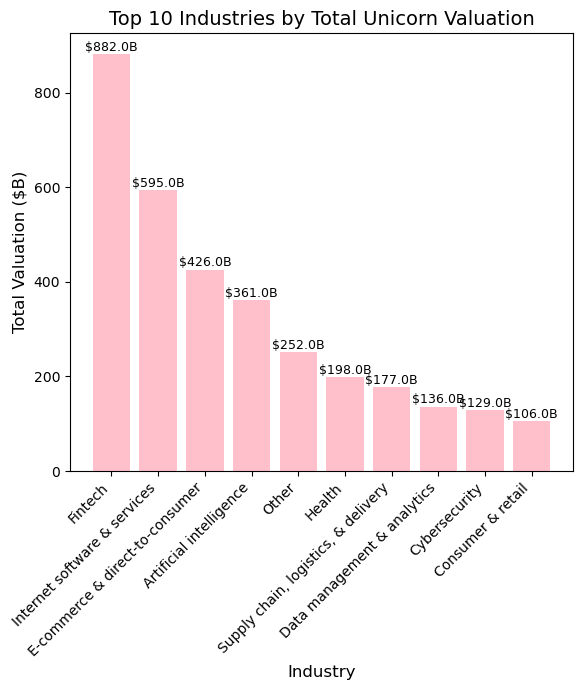

In [84]:
# Calculate total valuation per industry and get the top 10
industry_valuation = df.groupby('Industry')['Valuation ($B)'].sum()
top_industry_valuation = industry_valuation.sort_values(ascending=False).head(10)

# --- Plotting ---
# Create the figure and axes for the plot
plt.figure(figsize = (6, 7)) # Adjusted figsize for better readability of industry names

# Create the bar plot with the specified color
bars = plt.bar(x = top_industry_valuation.index,
               height = top_industry_valuation.values,
               color = 'pink') # Set color to red as requested

# Add labels and title
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Total Valuation ($B)', fontsize=12)
plt.title('Top 10 Industries by Total Unicorn Valuation', fontsize=14)

# Rotate x-axis labels for better readability and align them to the right
plt.xticks(rotation = 45, ha='right', fontsize=10)

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, # X-coordinate for text (center of the bar)
             yval + 0.5, # Y-coordinate for text (slightly above the bar)
             f'${yval:.1f}B', # Format to one decimal place with '$' and 'B'
             ha='center', # Horizontal alignment: center the text
             va='bottom', # Vertical alignment: align text to the bottom
             fontsize=9) # Font size for the data labels

# Display the plot
plt.show()



This Chart represents the total valuation (in billions of dollars, judging by the name `Valuation ($B)`) across different industries.

**Fintech** emerges as the absolute leader by a significant margin, boasting a total valuation of 882 billion dollars. This highlights the immense financial capital concentrated in the financial technology sector.

**Internet software & services** follows as the second-largest category with a substantial valuation of 595 billion dollars, demonstrating the strong market value of companies providing online software and services.

**E-commerce & direct-to-consumer** secures the third position with a total valuation of 426 billion dollars, indicating a robust and high-value online retail market.

**Artificial intelligence** also shows a significant total valuation of 361 billion dollars, underscoring its rapid growth and high investment. The "Other" category, while broad, still commands a considerable 252 billion dollars in valuation.

Other notable industries by valuation include **Health** (198 billion dollars), **Supply chain, logistics, & delivery** (177 billion dollars), **Data management & analytics** (136 billion dollars), and **Cybersecurity** (129 billion dollars). **Consumer & retail** closes out the top 10 with 106 billion dollars in total valuation.

In summary, the data clearly shows a dominant trend towards high valuations in **Fintech**, **Internet software**, and **E-commerce**, with **Artificial Intelligence** also being a major value driver.

In [85]:
top_industry_valuation

Industry
Fintech                                882
Internet software & services           595
E-commerce & direct-to-consumer        426
Artificial intelligence                361
Other                                  252
Health                                 198
Supply chain, logistics, & delivery    177
Data management & analytics            136
Cybersecurity                          129
Consumer & retail                      106
Name: Valuation ($B), dtype: int32

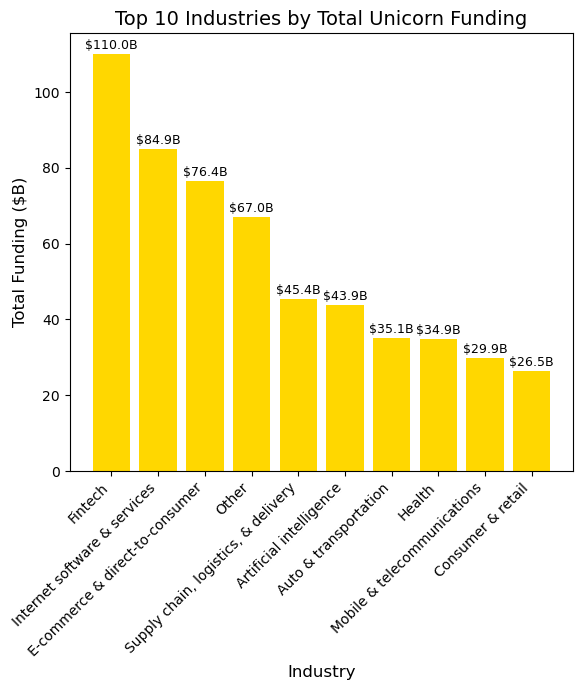

In [86]:
# --- Calculate total funding per industry and get the top 10 ---
industry_funding = df.groupby('Industry')['Funding ($B)'].sum()
top_industry_funding = industry_funding.sort_values(ascending=False).head(10)


plt.figure(figsize = (6, 7))


bars = plt.bar(x = top_industry_funding.index,
               height = top_industry_funding.values,
               color = 'gold') # Set bar color to red as requested


plt.xlabel('Industry', fontsize=12)
plt.ylabel('Total Funding ($B)', fontsize=12)
plt.title('Top 10 Industries by Total Unicorn Funding', fontsize=14)


plt.xticks(rotation = 45, ha='right', fontsize=10)

plt.tight_layout()

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.5, 
             f'${yval:.1f}B',
             ha='center',
             va='bottom',
             fontsize=9) 

# Display the plot
plt.show()

This Chart represents the total funding received (in billions of dollars) across various industries.

Fintech leads significantly in total funding, having secured approximately $110.00 billion. This indicates a very high level of investment and confidence in the financial technology sector.

Internet software & services follows as the second-highest funded industry with about $84.95 billion, reflecting substantial investment in software and service providers that operate online.

E-commerce & direct-to-consumer is also a major recipient of funding, with approximately $76.44 billion, underscoring strong investor interest in online retail and direct-to-consumer models.

The "Other" category, despite its general nature, shows considerable funding at around $67.02 billion. This suggests significant investment in diverse emerging or less-categorized sectors.

Further down the list, Supply chain, logistics, & delivery (approx. $$45.39 billion) and Artificial intelligence (approx. $43.93 billion) have also attracted substantial funding, highlighting strategic investments in these critical and emerging areas.

Auto & transportation (approx. $$35.07 billion) and Health (approx. $34.94 billion) show comparable levels of considerable funding, indicating ongoing development and investment in these sectors.

Finally, Mobile & telecommunications (approx. $$29.87 billion) and Consumer & retail (approx. $26.49 billion) also represent significant funding areas, though with slightly lower totals compared to the top industries.

In summary, the funding landscape is dominated by Fintech, Internet software & services, and E-commerce, showcasing the areas that are currently attracting the most substantial capital investment.

In [87]:
top_industry_funding

Industry
Fintech                                109.996
Internet software & services            84.945
E-commerce & direct-to-consumer         76.437
Other                                   67.019
Supply chain, logistics, & delivery     45.393
Artificial intelligence                 43.925
Auto & transportation                   35.074
Health                                  34.944
Mobile & telecommunications             29.870
Consumer & retail                       26.492
Name: Funding ($B), dtype: float64

 ## Growth Recommendations for Unicorns Companies
#1 Access Venture Capital funds when needed
- Unicorn companies in Africa, Oceania and South America should endeavour to approach venture capitals to negotiate how they can raise funds to scale their business. USA has over 500 Select investors supporting growth of Unicorns.
- Network with Unicorn Companies in Countries with high numbers of Select investors to sell their business to potential investors.
#2 Establishment of a growth culture within the business
- Develop and share future revenue and staffing objectives and projections to internal stakeholders
- Employ experienced employees with relevant skills and capabilities to meet current and future business needs.
- Ensure effective communication between all levels of management and eliminate office politics, prejudice and bias.
- Create and provide training and advancement opportunities for staff in order to drive retention.
#3 Leverage Emerging Technology
- Artificial Intelligence and Machine learning can help companies to improve their systems and processes. 46% of Unicorns are in Fintech and 31.4% are in Internet Software and Services.
#4 Focus on creating the right strategic objectives per time
- Growing customer base into new markets to increase revenue streams. There are more Unicorns in 2020 and 2022. 
- Investing more in research and developments to innovate and improve operational efficiency 
- networking and forming partnerships with other Unicorns. 47.8% of Unicorns are in San Francisco, 32.3% in New York, and 19.9% in Beijing. Other Unicorns can reach out to them for best practices on growth strategies.